In [14]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install librosa
!pip install IPython
!pip install warnings
!pip install os
!pip install pydub


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for warnings
ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import librosa
import soundfile as sf
import os

def convert_with_librosa(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    files = [f for f in os.listdir(source_dir) if f.lower().endswith(".mp3")]

    for file in files:
        print(f"Przetwarzanie: {file}")
        try:
            y, sr = librosa.load(os.path.join(source_dir, file), sr=22050, mono=True)

            filename_wav = os.path.splitext(file)[0] + ".wav"
            target_path = os.path.join(target_dir, filename_wav)

            # Zapisujemy jako WAV
            sf.write(target_path, y, sr)
        except Exception as e:
            print(f"Błąd przy {file}: {e}")

convert_with_librosa('lib/test-wav/country', 'lib/test-wav/country/country')

Przetwarzanie: 99_Tales-Baby_Out_Of_Jail.mp3
Przetwarzanie: Beat_Mekanik-Stampede.mp3
Przetwarzanie: Cletus_Got_Shot-Pour_Me_Another.mp3
Przetwarzanie: Lobo_Loco-Country_Boy-Remastered.mp3
Przetwarzanie: Rex_Hobart_the_Misery_Boys-Heartbreak_To_Hide.mp3


*1

W procesie obliczania odległości (np. Euklidesowej), różnica między cechą testową a wzorcową jest mnożona przez przypisaną wagę przed podniesieniem do kwadratu:$$d(x, y) = \sqrt{\sum w_i (x_i - y_i)^2}$$Dzięki temu cecha z wagą 4.0 ma czterokrotnie większy wpływ na ostateczny dystans niż cecha z wagą 1.0.

In [21]:
from matplotlib import pyplot as plt
import os
import librosa
import numpy as np
import pandas as pd
import warnings

# --- 1. SETUP ---
warnings.filterwarnings('ignore')

df_ref = pd.read_csv("lib/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")
X_ref = df_ref.drop(columns=['filename', 'length', 'label'])
y_ref = df_ref['label']
genres = sorted(y_ref.unique())

#Standaryzacja danych
#Z-score Normalization. Przekształca cechy tak, aby ich średnia wynosiła 0, a odchylenie standardowe 1.
#Cechy są skalowane ze względu na swoją rozbieżność np 100 i 0.1. Wtedy obliczenia byłyby zdominowane przez duże liczby.
global_mean = X_ref.mean()
global_std = X_ref.std()
X_ref_scaled = (X_ref - global_mean) / global_std

weights = pd.Series(1.0, index=X_ref.columns)

weights['spectral_bandwidth_mean'] *= 6.0

weights['chroma_stft_var'] *= 4.0
weights['chroma_stft_mean'] *= 2.0

weights['mfcc1_mean'] *= 2.5
weights['mfcc2_mean'] *= 3.0
weights['mfcc4_mean'] *= 2.5

weights['spectral_centroid_mean'] *= 2.5
weights['zero_crossing_rate_mean'] *= 2.5
weights['rolloff_mean'] *= 2.5

weights['rms_var'] *= 3.5
weights['perceptr_var'] *= 3.5
weights['spectral_centroid_var'] *= 3.0

weights['tempo'] = 1.15


# --- 2. FUNCTIONS ---
def extract_segment_features(y, sr):
    f = {}
    f['chroma_stft_mean'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    f['chroma_stft_var'] = np.var(librosa.feature.chroma_stft(y=y, sr=sr))
    f['rms_mean'] = np.mean(librosa.feature.rms(y=y))
    f['rms_var'] = np.var(librosa.feature.rms(y=y))
    f['spectral_centroid_mean'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    f['spectral_centroid_var'] = np.var(librosa.feature.spectral_centroid(y=y, sr=sr))
    f['spectral_bandwidth_mean'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    f['spectral_bandwidth_var'] = np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    f['rolloff_mean'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    f['rolloff_var'] = np.var(librosa.feature.spectral_rolloff(y=y, sr=sr))
    f['zero_crossing_rate_mean'] = np.mean(librosa.feature.zero_crossing_rate(y))
    f['zero_crossing_rate_var'] = np.var(librosa.feature.zero_crossing_rate(y))

    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    f['spectral_contrast_mean'] = np.mean(contrast)
    f['spectral_contrast_var'] = np.var(contrast)

    y_harm, y_perc = librosa.effects.hpss(y)
    f['harmony_mean'], f['harmony_var'] = np.mean(y_harm), np.var(y_harm)
    f['perceptr_mean'], f['perceptr_var'] = np.mean(y_perc), np.var(y_perc)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    f['tempo'] = tempo[0] if isinstance(tempo, (np.ndarray, list)) else tempo

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(1, 21):
        f[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
        f[f'mfcc{i}_var'] = np.var(mfccs[i-1])

    return pd.Series(f)

def classify_with_confidence(file_path, k=9, num_segments=15):
    try:
        y_full, sr = librosa.load(file_path, duration=30)
    except Exception:
        return "ERROR", 0

    seg_len = 3 * sr
    segment_winners = []

    common_cols = X_ref.columns

    #Wyselekcjonowanie wag dla konkretnych kolumn i przemnożenie całej bazy wzorcowej (X_ref) przez te wagi jeszcze przed wejściem do pętli.
    w_vals = weights[common_cols].values
    X_weighted = X_ref_scaled.values * w_vals

    for i in range(num_segments):
        start = i * seg_len
        if start + seg_len > len(y_full): break

        #Podział 30-sekundowego utworu na 15 fragmentów po 3 sekundy każdy.
        y_seg = y_full[start : start + seg_len]

        #Pominięcie ciszy
        if np.max(np.abs(y_seg)) < 0.02: continue

        #Dla każdego 3-sekundowego fragmentu wyliczane są cechy, które następnie są standaryzowane (Z-score) przy użyciu średniej i odchylenia z całej bazy. Na koniec nakładane są wagi.
        f_seg = extract_segment_features(y_seg, sr)
        f_seg_filtered = f_seg[common_cols]
        f_seg_scaled = (f_seg_filtered - global_mean) / global_std
        f_weighted = f_seg_scaled.values.reshape(1, -1) * w_vals

        #Wyliczenie Ważonej Odległości Euklidesowej. Następnie znalezienie k najbliższych sąsiadów. Zastosowano tzw. Soft Voting – sąsiad, który jest bliżej, ma silniejszy głos (1/dist).
        distances = np.sqrt(((X_weighted - f_weighted) ** 2).sum(axis=1))
        distances_series = pd.Series(distances, index=X_ref.index)

        seg_genre_scores = {g: 0.0 for g in genres}
        nearest = distances_series.nsmallest(k)
        for idx, dist in nearest.items():
            label = y_ref.loc[idx]
            seg_genre_scores[label] += (1.0 / (dist + 1e-6))

        segment_winners.append(max(seg_genre_scores, key=seg_genre_scores.get))

    if not segment_winners:
        return "unknown", 0

    #Po przeanalizowaniu wszystkich 15 segmentów, algorytm sprawdza, który gatunek wygrywał najczęściej (używając klasy Counter)
    from collections import Counter
    counts = Counter(segment_winners)
    winner, winner_count = counts.most_common(1)[0]

    confidence = (winner_count / len(segment_winners)) * 100

    return winner, confidence

# --- 3. TEST FUNCTION ---
from sklearn.metrics import confusion_matrix
import seaborn as sns

def run_advanced_audit(base_dir, limit_per_genre=100, only_genre=None):
    all_true = []
    all_pred = []
    detailed_results = []

    selected_genres = [only_genre] if only_genre else genres

    print(f"--- ANALIZA TECHNICZNA BAZY (Limit: {limit_per_genre}) ---")

    for genre in selected_genres:
        folder_path = os.path.join(base_dir, genre)
        if not os.path.exists(folder_path) or len(os.listdir(folder_path)) == 0: continue

        files = [f for f in os.listdir(folder_path) if f.endswith('.wav')][:limit_per_genre]
        print(f"\n[ Gatunek: {genre.upper()} ]")

        correct_in_genre = 0
        for filename in files:
            # Pomiń znany uszkodzony plik
            if filename == "jazz.00054.wav": continue

            path = os.path.join(folder_path, filename)
            pred, conf = classify_with_confidence(path)

            all_true.append(genre)
            all_pred.append(pred)

            is_correct = (pred == genre)
            if is_correct: correct_in_genre += 1

            status = "✔" if is_correct else "✘"
            print(f"  {status} {filename} -> {pred.upper()} ({conf:.1f}%)")

            detailed_results.append({
                'filename': filename, 'real': genre, 'pred': pred, 'conf': conf
            })

        acc = (correct_in_genre / len(files)) * 100
        print(f"  >>> Skuteczność dla {genre}: {acc:.2f}%")

    # --- GENEROWANIE MACIERZY POMYŁEK (tylko przy pełnym audycie) ---
    if not only_genre:
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(all_true, all_pred, labels=genres)
        sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=genres, yticklabels=genres)
        plt.title("MACIERZ POMYŁEK (Confusion Matrix)")
        plt.ylabel("Prawdziwy Gatunek")
        plt.show()

    # --- ANALIZA CECH CHARAKTERYSTYCZNYCH ---
    if only_genre:
        print(f"\n--- ANALIZA PROFILU GATUNKU: {only_genre.upper()} ---")
        genre_means = df_ref[df_ref['label'] == only_genre].mean(numeric_only=True)
        # Obliczamy które cechy najbardziej odbiegają od średniej globalnej
        diffs = (genre_means - global_mean) / global_std
        top_3 = diffs.abs().sort_values(ascending=False).head(3)
        for feat, val in top_3.items():
            direction = "Wysoka" if diffs[feat] > 0 else "Niska"
            print(f"  * {feat}: {direction} (odchylenie: {val:.2f} standardowych)")

    return pd.DataFrame(detailed_results)

base_dir = 'lib/gtzan-dataset-music-genre-classification/Data/genres_original'

# PRZYKŁADY UŻYCIA:
# 1. Testuj tylko Rocka (żeby sprawdzić rock.00016.wav):
# report = run_full_database_audit(base_dir, limit_per_genre=100, only_genre='rock')

# 2. Testuj tylko Jazza (żeby sprawdzić jazz.00054.wav):
# report = run_full_database_audit(base_dir, limit_per_genre=100,  only_genre='rock')
# report = run_full_database_audit(base_dir, limit_per_genre=100,  only_genre='metal')


#
# print(pred, conf)

--- ANALIZA TECHNICZNA BAZY (Limit: 5) ---

[ Gatunek: COUNTRY ]
  ✘ 99_Tales-Baby_Out_Of_Jail.wav -> METAL (80.0%)
  ✘ Beat_Mekanik-Stampede.wav -> REGGAE (33.3%)
  ✘ Cletus_Got_Shot-Pour_Me_Another.wav -> HIPHOP (60.0%)
  ✘ Lobo_Loco-Country_Boy-Remastered.wav -> HIPHOP (93.3%)
  ✘ Rex_Hobart_the_Misery_Boys-Heartbreak_To_Hide.wav -> REGGAE (26.7%)
  >>> Skuteczność dla country: 0.00%

[ Gatunek: ROCK ]
  ✘ Here_Comes_A_Big_Black_Cloud-Vietnam.wav -> METAL (33.3%)
  ✘ Jon_Shuemaker-Watch_Me_Wither.wav -> COUNTRY (80.0%)
  ✘ Lemon_Knife-Not_on_Mars.wav -> METAL (60.0%)
  ✘ Rod-Inner_Voices.wav -> COUNTRY (40.0%)
  ✘ Rod-The_River_Of_The_Dream.wav -> CLASSICAL (26.7%)
  >>> Skuteczność dla rock: 0.00%


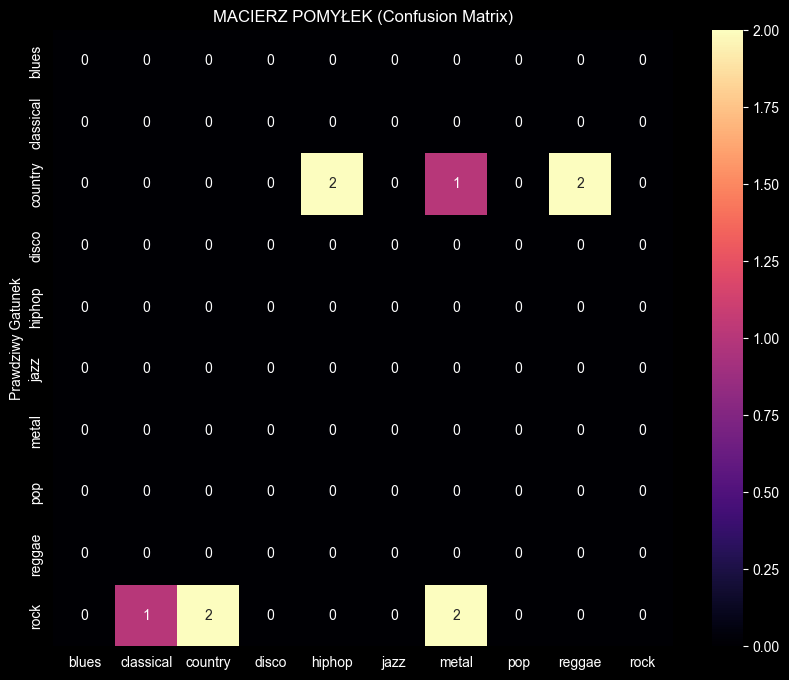

In [22]:
# k=9
# path_to_bad_file = 'lib/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00016.wav'
# pred, conf = classify_with_confidence(path_to_bad_file, k=k)
# print(f"Wynik dla rock.00016: {pred} ({conf}%)")
# #
# path_to_bad_file = 'lib/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav'
# pred, conf = classify_with_confidence(path_to_bad_file, k=k)
# print(f"Wynik dla metal.00058: {pred} ({conf}%)")

#report = run_advanced_audit(base_dir, limit_per_genre=100)

test_dir = 'lib/test-wav'
report = run_advanced_audit(test_dir, limit_per_genre=5)
